# Task 1.1 Data Understanding
*Alberto Roberto Marinelli, Giacomo Cignoni, Alessandro Bucci*
## Importing Libraries
First we import the libraries necessary to analyze the data

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import decomposition

Then we load the datasets

In [4]:
df_tweets_sample = pd.read_csv('./dataset/tweets_sample.csv', sep=',', index_col=0)  # load tweets
df_users = pd.read_csv('./dataset/users.csv', sep=',', index_col=0)  # load users

## Information about the datasets
The user dataset is composed of 6 columns: id, name, lang, bot, created_at and statuses_count

In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [6]:
df_users

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0
...,...,...,...,...,...
2911861962,Madrid Lae Maika .,en,0,2019-11-29 13:16:02,1126.0
1378532629,Clau Sato,en,0,2018-04-27 03:01:58,3024.0
126984069,ALMA LETICIA NUÑO,es,0,2015-03-29 17:01:24,6.0


The tweets dataset is composed of 10 columns: id, user_id, retweet_count, reply_count, favorite_count, num_hashtags, num_urls, num_mentions, created_at and text

In [7]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         134464 non-null  object
 1   retweet_count   132232 non-null  object
 2   reply_count     130163 non-null  object
 3   favorite_count  130128 non-null  object
 4   num_hashtags    126020 non-null  object
 5   num_urls        130145 non-null  object
 6   num_mentions    128069 non-null  object
 7   created_at      136647 non-null  object
 8   text            131286 non-null  object
dtypes: object(9)
memory usage: 10.4+ MB


In [8]:
df_tweets_sample

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
528578456452612097,567430901,0,0,0,0,0,0,2019-11-03 16:04:59,"La sera, a letto.Lui:- FarÃ² di te la donna pi..."
492852780101406721,277506943,0,0,2,1,0,0,2019-07-28 02:03:54,#RFGoNaked http://t.co/eaf1sO4TWL
888885286917605,317296274,0,dcl83oci,NaN,NaN,NaN,NaN,2020-03-21 17:43:22,Volunteers report 100% retail tobacco complian...
516101108960206848,1372026204,0,0,0,4,1,0,2019-09-30 05:44:27,What HR Lessons Did I Learn Whilst Managing Me...
528187250392461312,468101494,0,0,0,0,0,0,2019-11-02 14:10:28,"-Cara, ti voglio POSSEDERE dove non te ti ha m..."
...,...,...,...,...,...,...,...,...,...
500184073814700033,576148031,0,0,0,0,0,0,2019-08-17 07:35:50,"Porta bene Renzi! Grazie ""presidente"""
578072909085724672,25693756,0,0,0,0,0,1,2020-03-19 05:58:16,@malakhstudios You OK?
588013533557841920,2395918790,0,0,0,0,0,0,2020-04-15 16:18:45,"If there is Jacob Whiteside, there is also Jac..."


We found out that some user_ids in the tweets were NaN or a different type rather than int, it means that we would not be able to join them with the user dataset, so we decided to drop them out of the dataframe.

In [9]:
df_tweets_sample['user_id'] = pd.to_numeric(df_tweets_sample['user_id'], downcast= 'integer', errors='coerce') # After this instruction the column becomes numerics
                                                                                                 # The coerce option converts all types != int in NaN
df_tweets_sample.drop(df_tweets_sample[df_tweets_sample['user_id'].isnull()].index, inplace=True) # Drop NaN in col 'user_id'
df_tweets_sample['user_id'] = df_tweets_sample['user_id'].astype('Int64', errors='ignore') # Cast to int

df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132270 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         132270 non-null  Int64 
 1   retweet_count   128720 non-null  object
 2   reply_count     127143 non-null  object
 3   favorite_count  127112 non-null  object
 4   num_hashtags    124042 non-null  object
 5   num_urls        127115 non-null  object
 6   num_mentions    125536 non-null  object
 7   created_at      132270 non-null  object
 8   text            128058 non-null  object
dtypes: Int64(1), object(8)
memory usage: 10.2+ MB


Now we give a look at the heatmap to show all the missing values

<AxesSubplot:ylabel='id'>

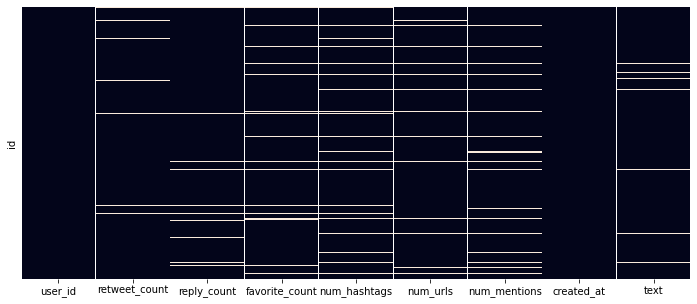

In [10]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets_sample.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)

## Features informations:
### Users dataset
id, name, lang, bot, created_at and statuses_count
* **id**
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer.
* **name**
  * Type: **String**
  * Description: The name of the user.
* **lang**
  * Type: **Int32**
  * Description: The user’s language selected
* **bot**
  * Type: **Boolean**
  * Description: A binary variable that indicates if a user is a bot or a genuine user
* **created_at**
  * Type: **Datetime64**
  * Description: The timestamp of when the user was created
* **statuses_count**
  * Type: **Int32**
  * Description: The count of the tweets made by the user at the moment of data crawling.
### Tweets dataset
* **id**
  * Type: **Object**
  * Description: Is the identifier of the single tweet, it should be int64, but we decided to consder it object because it does not affect the data if it is not an integer.
* **user_id**
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer
* **retweet_count**
  * Type: **Int32**
  * Description: The number of retweets of the single tweet
* **reply_count**
  * Type: **Int32**
  * Description: The number of replies of the single tweet
* **favorite_count**
  * Type: **Int32**
  * Description: The number of favorites (or likes) of the single tweet
* **num_hashtags**
  * Type: **Int32**
  * Description: The number of hashtags in the single tweet
* **num_urls**
  * Type: **Int32**
  * Description: The number of urls in the single tweet
* **num_mentions**
  * Type: **Int32**
  * Description: The number of mentions in the single tweet
* **created_at**
  * Type: **Datetime64**
  * Description: The timestamp of when the single tweet was created
* **text**
  * Type: **String**
  * Description: The text of the single tweet